In [3]:
# Paso 1: Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Paso 2: Leer el archivo CSV
# Usamos sep=';' porque el archivo está separado por punto y coma
df = pd.read_csv('data.csv', sep=';', encoding='utf-8', low_memory=False)

In [7]:
# Paso 3: Verificar la lectura del archivo
print("Número de filas:", len(df))
print("Número de columnas:", len(df.columns))

Número de filas: 220
Número de columnas: 34


In [8]:
# Mostrar las primeras columnas
print("\nPrimeras columnas:")
print(df.columns[:10].tolist())



Primeras columnas:
['punto', 'Fecha', 'Hora', 'Sector', 'Altura(msn)', 'Collector', 'Altura_planta(cm)', 'Foto', 'Foto_montaje', 'Num_muestras']


In [9]:
# Mostrar las primeras filas
print("\nPrimeras filas:")
print(df.head())


Primeras filas:
   punto       Fecha     Hora                 Sector Altura(msn)  \
0      1  12/05/2019  9:06:00      Quebrada La Vieja     2810,88   
1      2  12/05/2019  9:00:00      Quebrada La Vieja     2810,88   
2      3   2/04/2020  9:24:00  Quebrada las delicias     2852,81   
3      4   2/04/2020  8:42:00  Quebrada las delicias     2867,66   
4      5   2/04/2020  9:05:00  Quebrada las delicias     2891,53   

      Collector  Altura_planta(cm)               Foto Foto_montaje  \
0  Nelson Nieto               30.0  1575554959829.jpg    no aplica   
1  Nelson Nieto              160.0  1575554547106.jpg    no aplica   
2  Nelson Nieto              600.0  1580826406135.jpg    no aplica   
3  Nelson Nieto              250.0  1580823840589.jpg    no aplica   
4  Nelson Nieto              120.0  1580825203553.jpg    no aplica   

   Num_muestras  ...  salud.1  fenologia      Longitud      Latitud est  ze  \
0             1  ...      NaN        NaN  -74,04363049  4,645132215 NaN Na

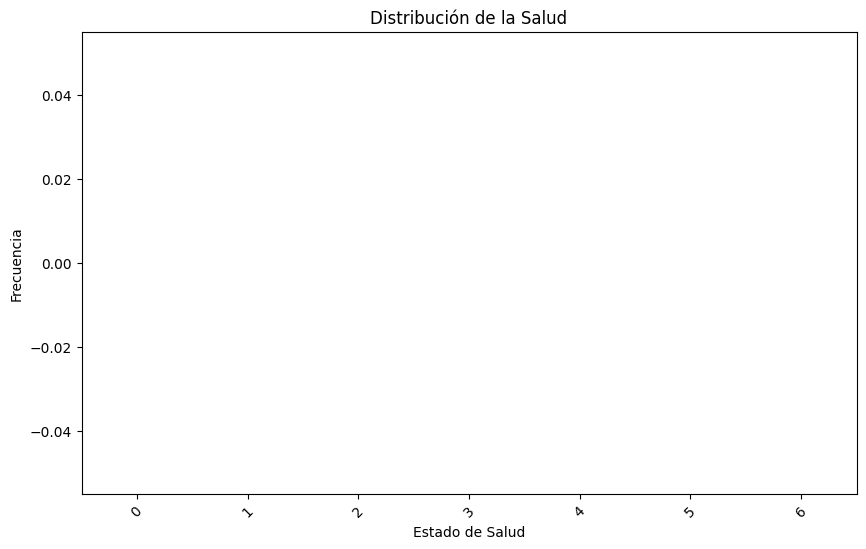

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='salud')  # Cambir 'salud' por otra columna categórica si se prefiere
plt.title('Distribución de la Salud')
plt.xlabel('Estado de Salud')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

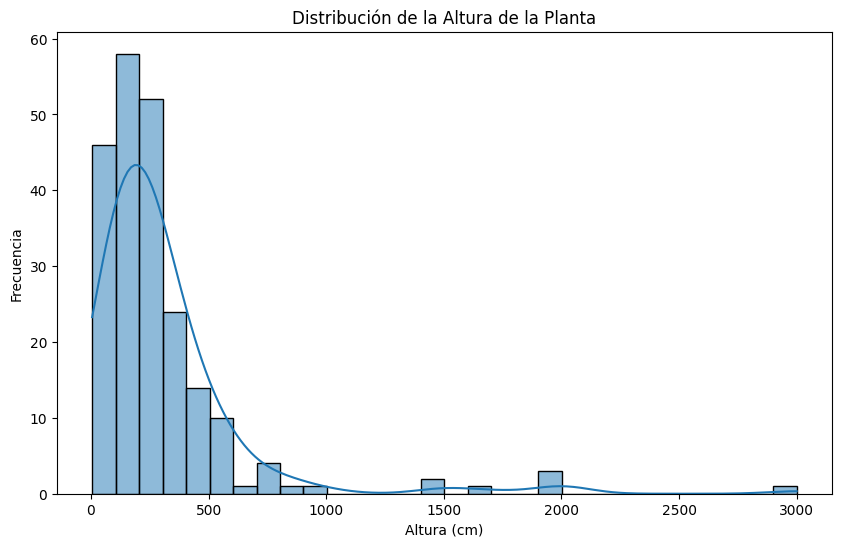

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Altura_planta(cm)', bins=30, kde=True)
plt.title('Distribución de la Altura de la Planta')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.show()


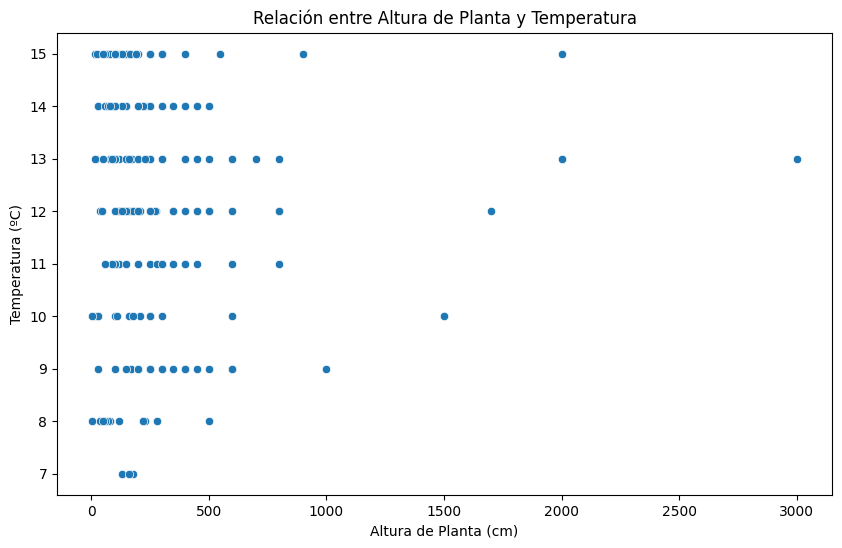

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Altura_planta(cm)', y='Temperatura(ºC)')
plt.title('Relación entre Altura de Planta y Temperatura')
plt.xlabel('Altura de Planta (cm)')
plt.ylabel('Temperatura (ºC)')
plt.show()

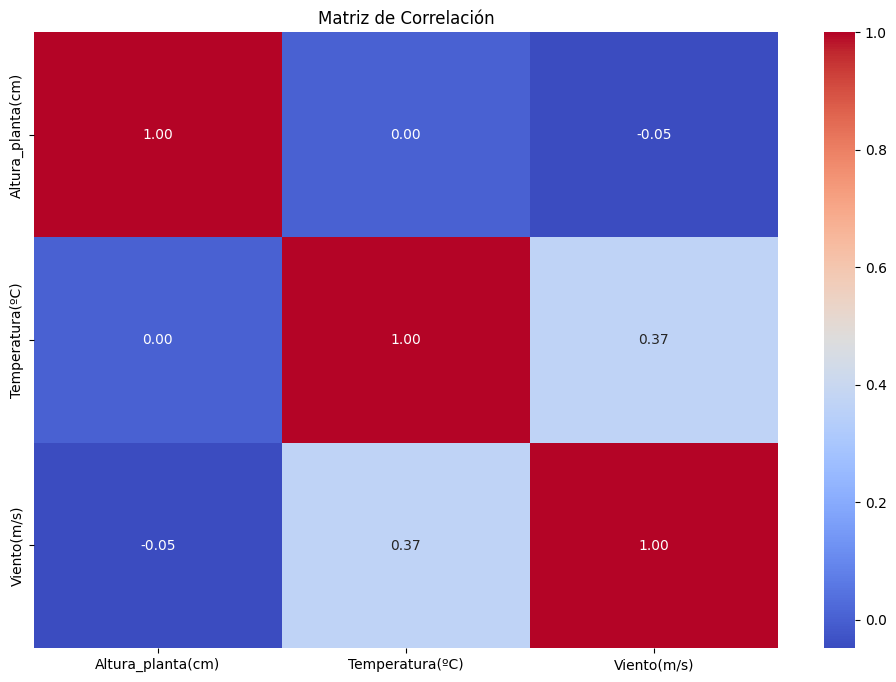

In [13]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[['Altura_planta(cm)', 'Temperatura(ºC)', 'Viento(m/s)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

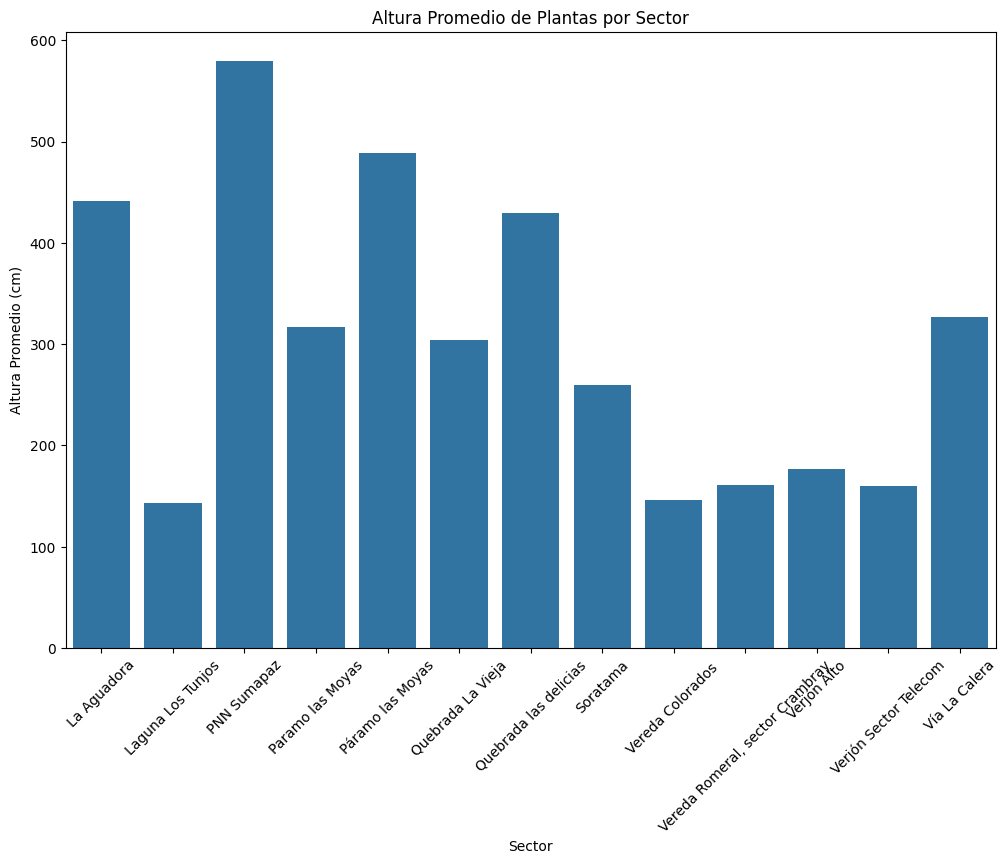

In [14]:
# Gráfico de Barras por Categoría
plt.figure(figsize=(12, 8))
df_grouped = df.groupby('Sector')['Altura_planta(cm)'].mean().reset_index()
sns.barplot(data=df_grouped, x='Sector', y='Altura_planta(cm)')
plt.title('Altura Promedio de Plantas por Sector')
plt.xlabel('Sector')
plt.ylabel('Altura Promedio (cm)')
plt.xticks(rotation=45)
plt.show()

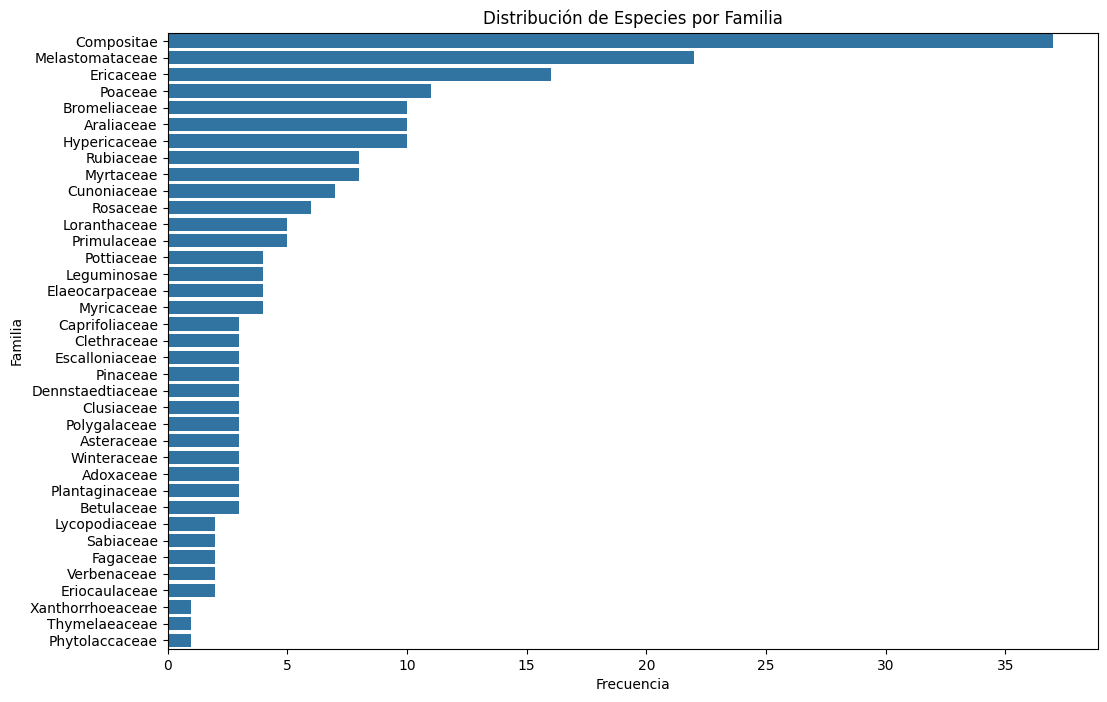

In [15]:
#Graficas Funcionales
#Distribución de Especies por Familia
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Familia', order=df['Familia'].value_counts().index)
plt.title('Distribución de Especies por Familia')
plt.xlabel('Frecuencia')
plt.ylabel('Familia')
plt.show()

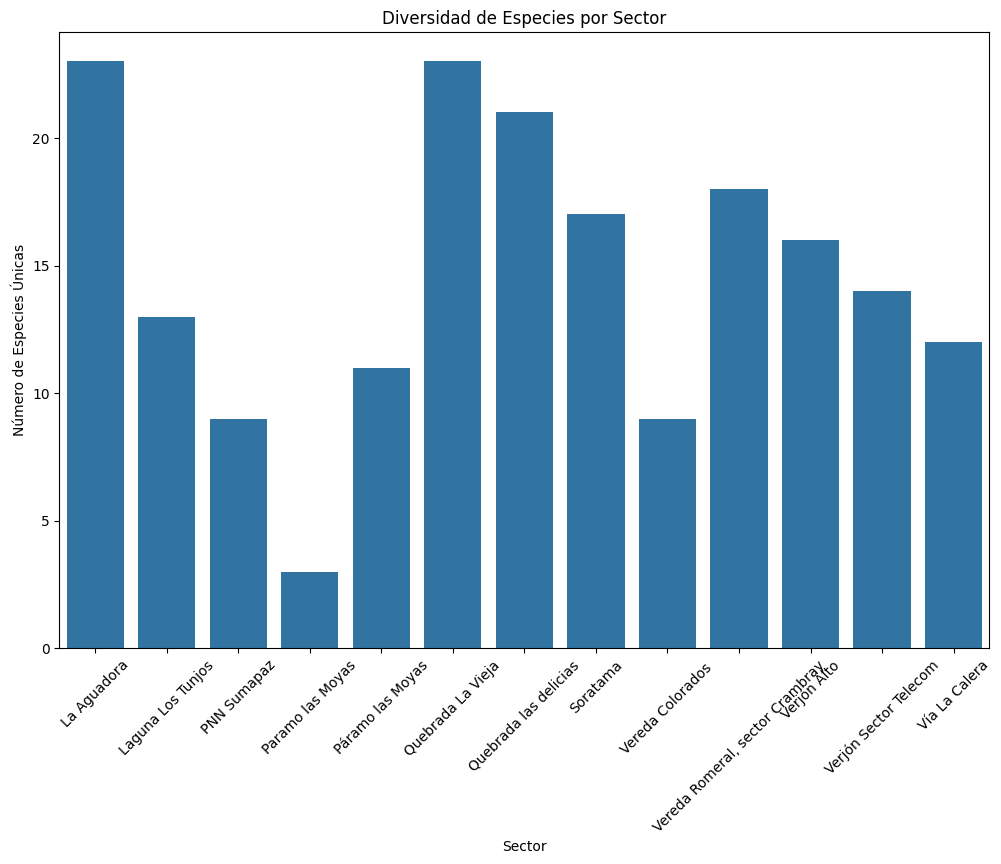

In [16]:
#Diversidad de Especies por Sector
plt.figure(figsize=(12, 8))
species_per_sector = df.groupby('Sector')['Especies'].nunique().reset_index()
sns.barplot(data=species_per_sector, x='Sector', y='Especies')
plt.title('Diversidad de Especies por Sector')
plt.xlabel('Sector')
plt.ylabel('Número de Especies Únicas')
plt.xticks(rotation=45)
plt.show()

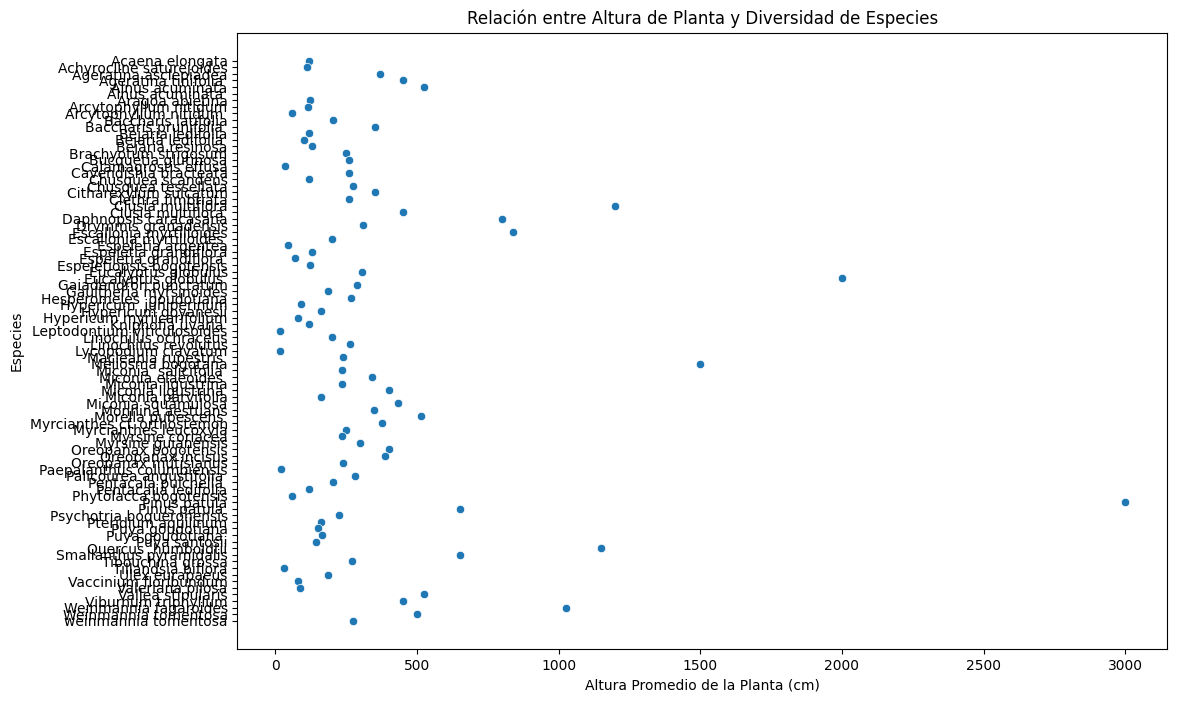

In [17]:
#Relación entre Altura de las Plantas y Diversidad
plt.figure(figsize=(12, 8))
avg_height_per_species = df.groupby('Especies')['Altura_planta(cm)'].mean().reset_index()
sns.scatterplot(data=avg_height_per_species, x='Altura_planta(cm)', y='Especies')
plt.title('Relación entre Altura de Planta y Diversidad de Especies')
plt.xlabel('Altura Promedio de la Planta (cm)')
plt.ylabel('Especies')
plt.show()

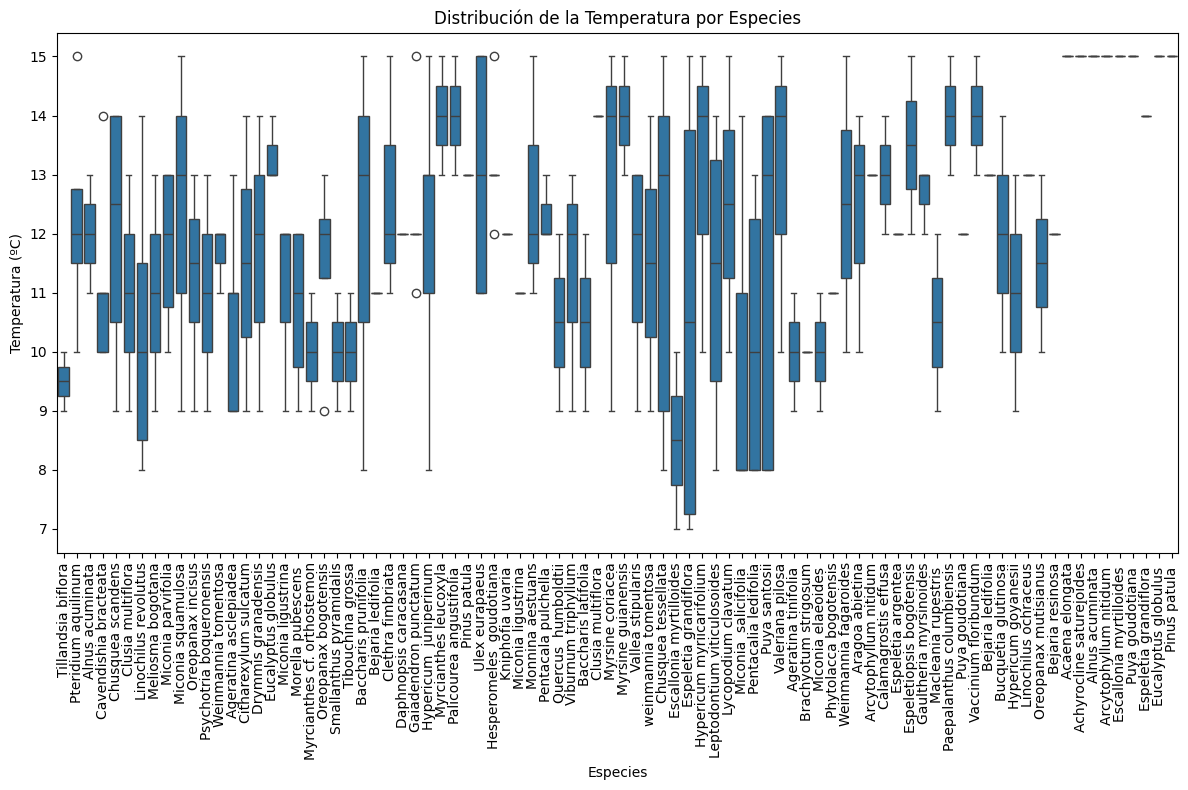

In [27]:
# Condiciones Ambientales por Especies con etiquetas verticales
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Especies', y='Temperatura(ºC)')
plt.title('Distribución de la Temperatura por Especies')
plt.xlabel('Especies')
plt.ylabel('Temperatura (ºC)')

# Rotar etiquetas del eje X (Especies) a 90 grados para que sean verticales
plt.xticks(rotation=90, fontsize=10)

plt.tight_layout()  # Ajustar automáticamente el diseño para evitar superposiciones
plt.show()


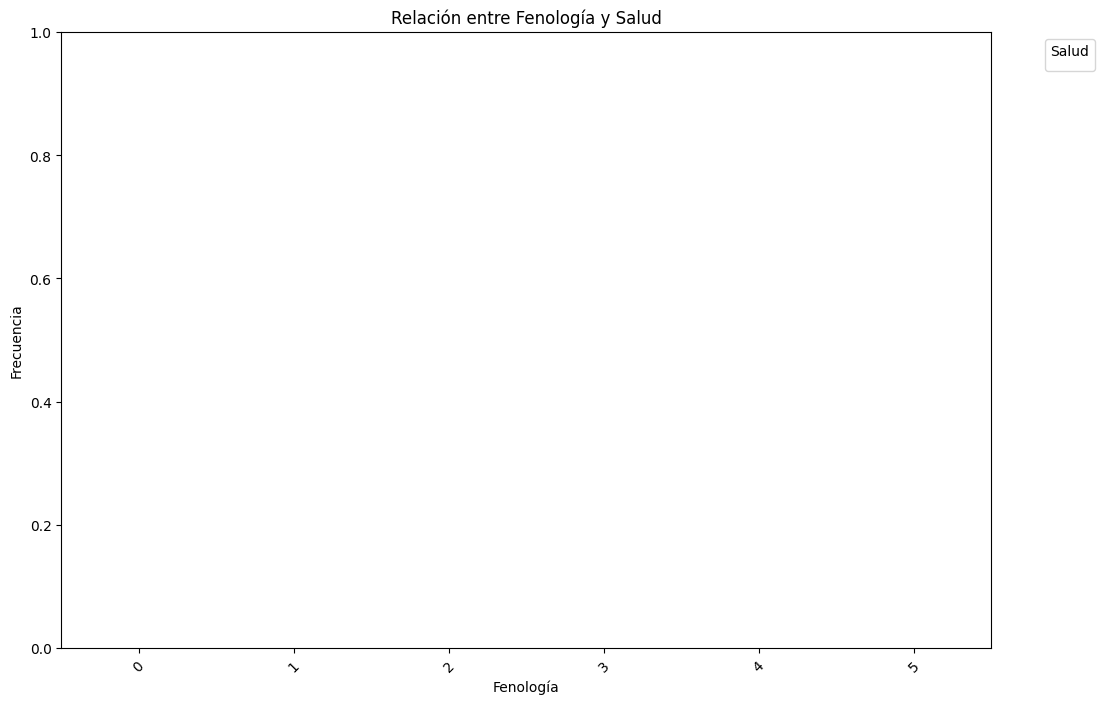

In [21]:
#Relación entre Fenología y Salud
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='fenologia', hue='salud')
plt.title('Relación entre Fenología y Salud')
plt.xlabel('Fenología')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Salud', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [22]:
#Grafica 3 ajustes para la visualizacion
# Mostrar las 10 especies con más registros para evitar sobrecarga visual
top_species = df['Especies'].value_counts().head(10).index
filtered_df = df[df['Especies'].isin(top_species)]

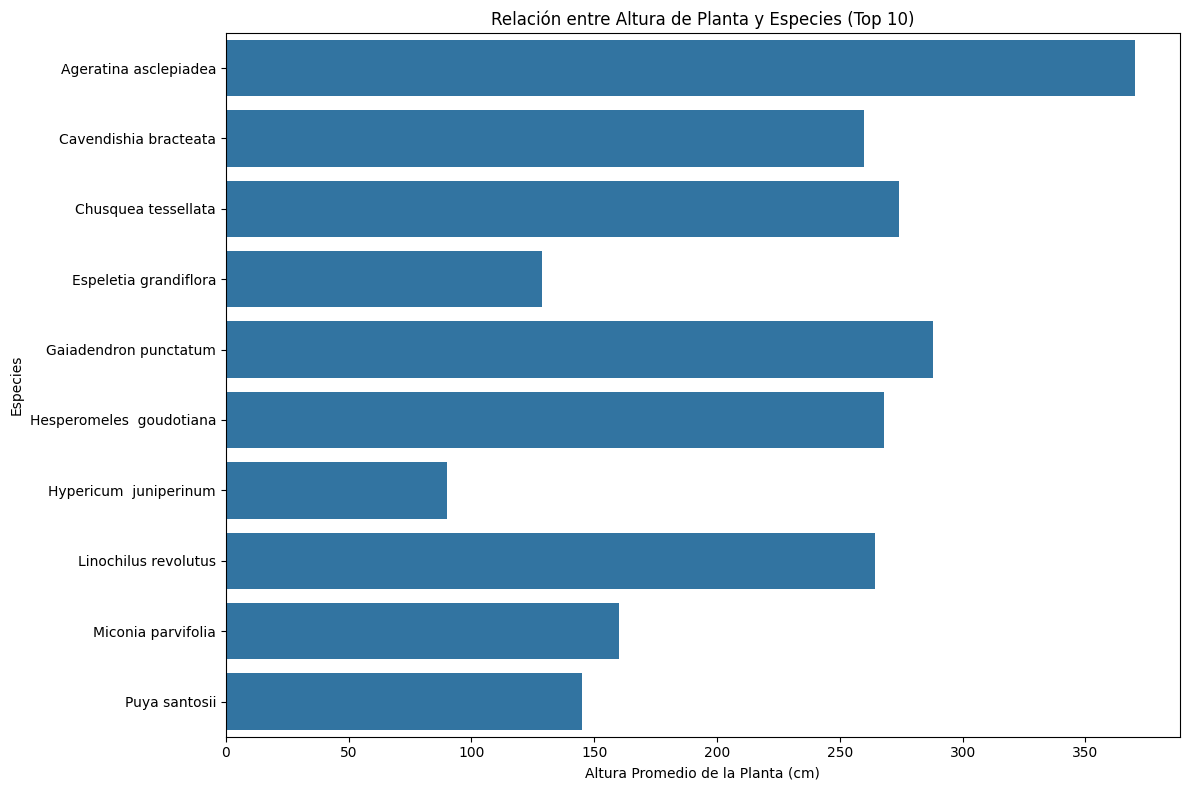

In [23]:
plt.figure(figsize=(12, 8))
avg_height_per_species = filtered_df.groupby('Especies')['Altura_planta(cm)'].mean().reset_index()
sns.barplot(data=avg_height_per_species, x='Altura_planta(cm)', y='Especies')
plt.title('Relación entre Altura de Planta y Especies (Top 10)')
plt.xlabel('Altura Promedio de la Planta (cm)')
plt.ylabel('Especies')
plt.tight_layout()  # Ajusta la gráfica para que las etiquetas no se superpongan
plt.show()

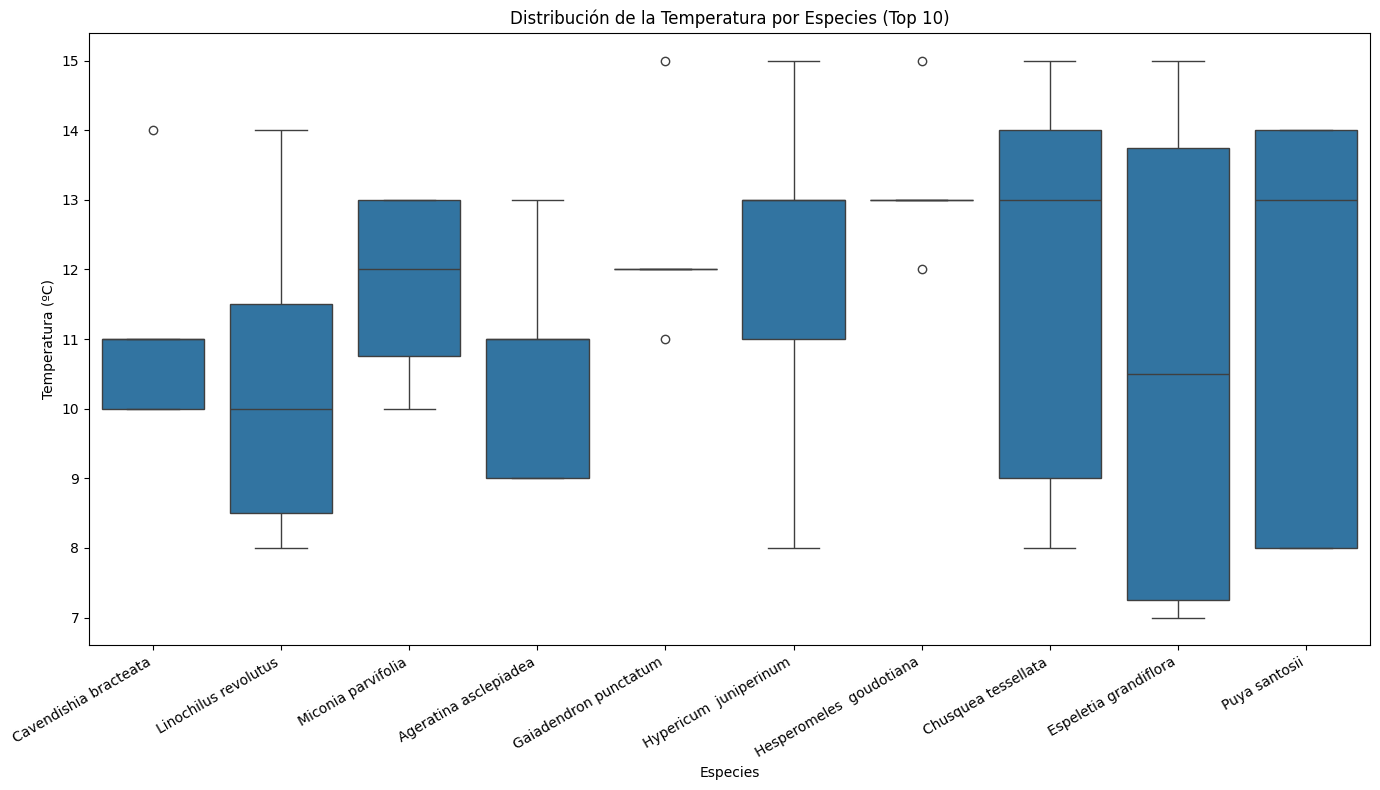

In [24]:
#Grafico 4
# Filtrar para las 10 especies más frecuentes
filtered_df = df[df['Especies'].isin(top_species)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='Especies', y='Temperatura(ºC)')
plt.title('Distribución de la Temperatura por Especies (Top 10)')
plt.xlabel('Especies')
plt.ylabel('Temperatura (ºC)')
plt.xticks(rotation=30, ha='right', fontsize=10)  # Rotar etiquetas para mayor legibilidad
plt.tight_layout()
plt.show()

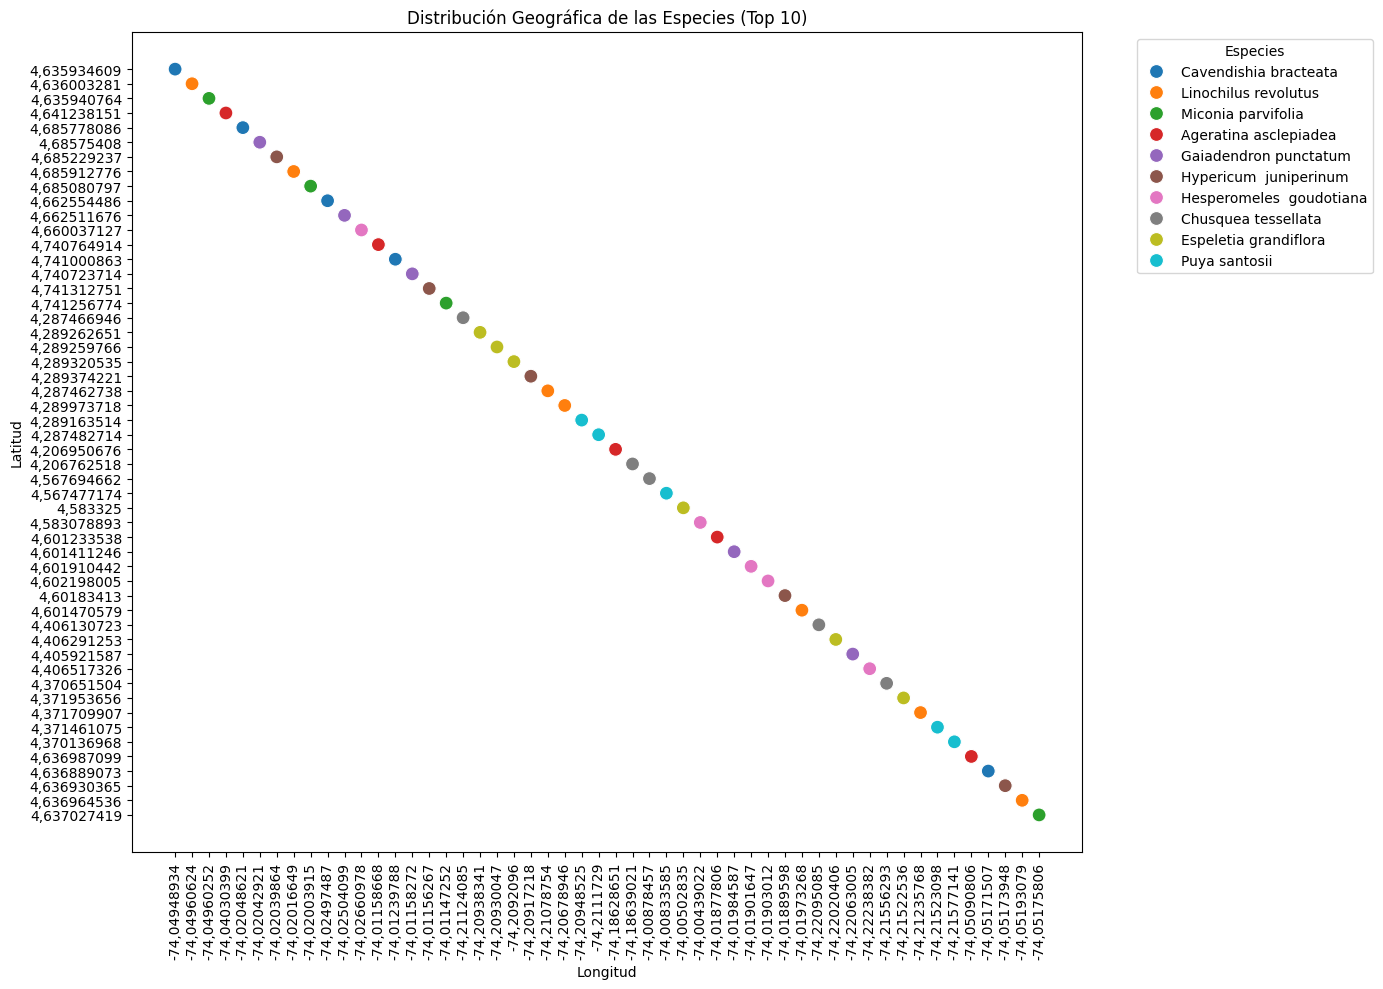

In [26]:
# Distribución Geográfica con etiquetas de Longitud verticales
plt.figure(figsize=(14, 10))
sns.scatterplot(data=filtered_df, x='Longitud', y='Latitud', hue='Especies', palette='tab10', s=100)
plt.title('Distribución Geográfica de las Especies (Top 10)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Rotar las etiquetas del eje X (Longitud) a 90 grados
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Ajustar la leyenda y diseño
plt.legend(title='Especies', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [28]:
plt.figure(figsize=(14, 10))  # Configura el tamaño (ancho x alto)
sns.scatterplot(data=filtered_df, x='Longitud', y='Latitud', hue='Especies', palette='tab10', s=100)
plt.title('Distribución Geográfica de las Especies (Top 10)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Especies', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Exportar la imagen
plt.savefig('distribucion_geografica.png', dpi=300, bbox_inches='tight')
plt.close()  # Cierra la figura después de guardarla


In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Altura_planta(cm)', y='Especies')
plt.title('Relación entre Altura de Planta y Diversidad')
plt.xlabel('Altura de Planta (cm)')
plt.ylabel('Especies')
plt.xticks(rotation=45)
plt.tight_layout()

# Exportar la imagen
plt.savefig('relacion_altura_diversidad.png', dpi=300, bbox_inches='tight')
plt.close()


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfica 1: Distribución Geográfica de las Especies (Top 10)
plt.figure(figsize=(14, 10))
sns.scatterplot(data=filtered_df, x='Longitud', y='Latitud', hue='Especies', palette='tab10', s=100)
plt.title('Distribución Geográfica de las Especies (Top 10)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Especies', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('distribucion_geografica_top10.png', dpi=300, bbox_inches='tight')
plt.close()

# Gráfica 2: Relación entre Altura de Planta y Diversidad (Top 10)
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='Altura_planta(cm)', y='Especies', palette='tab10')
plt.title('Relación entre Altura de Planta y Diversidad (Top 10)')
plt.xlabel('Altura de Planta (cm)')
plt.ylabel('Especies')
plt.tight_layout()
plt.savefig('relacion_altura_diversidad_top10.png', dpi=300, bbox_inches='tight')
plt.close()

# Gráfica 3: Distribución de la Temperatura por Especies (Top 10)
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='Especies', y='Temperatura(ºC)', palette='tab10')
plt.title('Distribución de la Temperatura por Especies (Top 10)')
plt.xlabel('Especies')
plt.ylabel('Temperatura (ºC)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('temperatura_especies_top10.png', dpi=300, bbox_inches='tight')
plt.close()

print("Las gráficas se han exportado correctamente.")


<ipython-input-31-742b149ec9d6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Altura_planta(cm)', y='Especies', palette='tab10')
<ipython-input-31-742b149ec9d6>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Especies', y='Temperatura(ºC)', palette='tab10')


Las gráficas se han exportado correctamente.


In [32]:
# Gráfica 2: Relación entre Altura de Planta y Diversidad (Top 10)
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='Altura_planta(cm)', y='Especies', hue='Especies', palette='tab10', dodge=False)
plt.title('Relación entre Altura de Planta y Diversidad (Top 10)')
plt.xlabel('Altura de Planta (cm)')
plt.ylabel('Especies')
plt.tight_layout()
plt.savefig('relacion_altura_diversidad_top10.png', dpi=300, bbox_inches='tight')
plt.close()

# Gráfica 3: Distribución de la Temperatura por Especies (Top 10)
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='Especies', y='Temperatura(ºC)', hue='Especies', palette='tab10', dodge=False)
plt.title('Distribución de la Temperatura por Especies (Top 10)')
plt.xlabel('Especies')
plt.ylabel('Temperatura (ºC)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('temperatura_especies_top10.png', dpi=300, bbox_inches='tight')
plt.close()

print("Las gráficas se han exportado correctamente.")


Las gráficas se han exportado correctamente.


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfica 1: Distribución Geográfica de las Especies (Top 10)
plt.figure(figsize=(14, 10))
sns.scatterplot(data=filtered_df, x='Longitud', y='Latitud', hue='Especies', palette='tab10', s=100)
plt.title('Distribución Geográfica de las Especies (Top 10)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Especies', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('distribucion_geografica_top10.png', dpi=300, bbox_inches='tight')
plt.close()

# Gráfica 4: Condiciones Ambientales por Especies
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_df, x='Temperatura(ºC)', y='Altura_planta(cm)', hue='Especies', palette='tab10', s=100)
plt.title('Condiciones Ambientales por Especies (Top 10)')
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Altura de Planta (cm)')
plt.legend(title='Especies', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('condiciones_ambientales_especies_top10.png', dpi=300, bbox_inches='tight')
plt.close()

print("Todas las gráficas se han exportado correctamente.")

Todas las gráficas se han exportado correctamente.
